***Analizing The Affect of using and not using of data normalizaiton:***

**Results:** 
With Data Normalization Test Accuracy: 0.9929999709129333
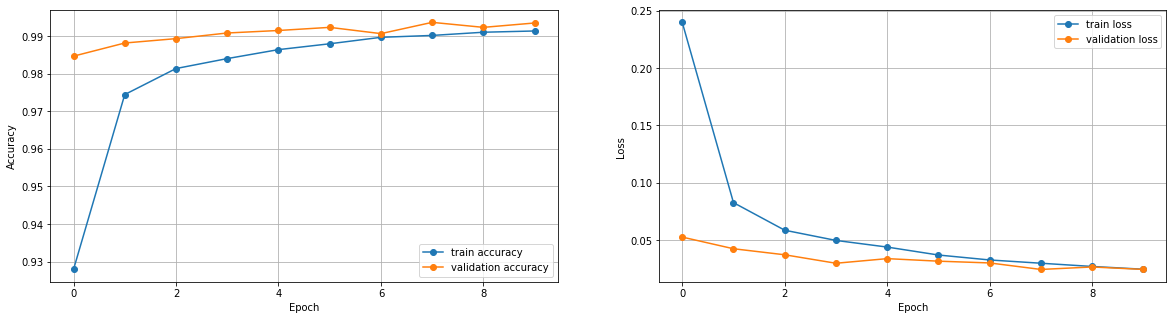


Without Data Normalizatin Test Accuracy: 0.988099992275238
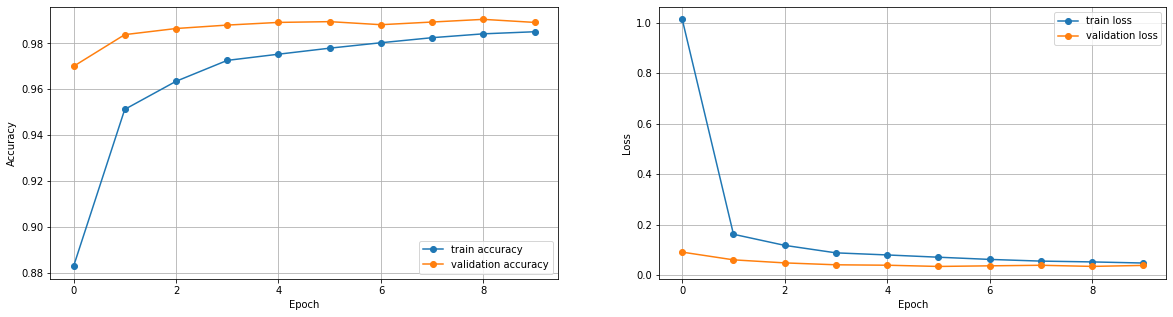



From the results it is clear that for this dataset Data Normalizatin is required as it increases the accuracy and therefore increases the performance of the model.



**Analyzing the affect of using Different optimizers:**

ADAM with Normalized Data:
Test Accuracy: 0.9929999709129333
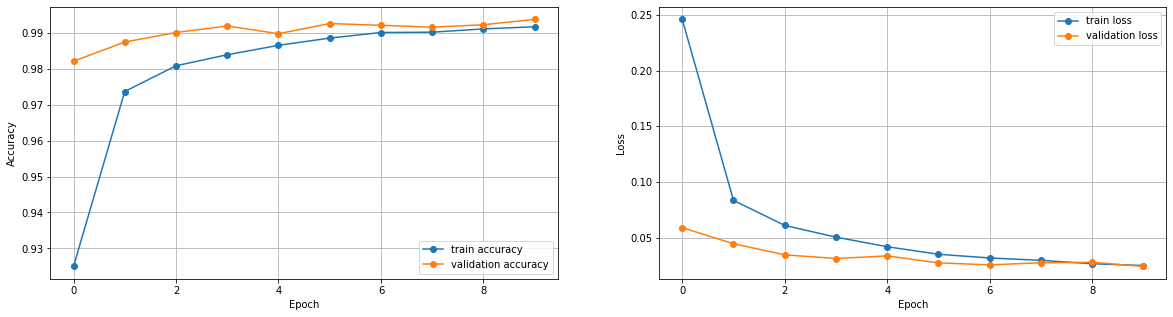


SGD with Normalized Data:
Test Accuracy: 0.9702000021934509
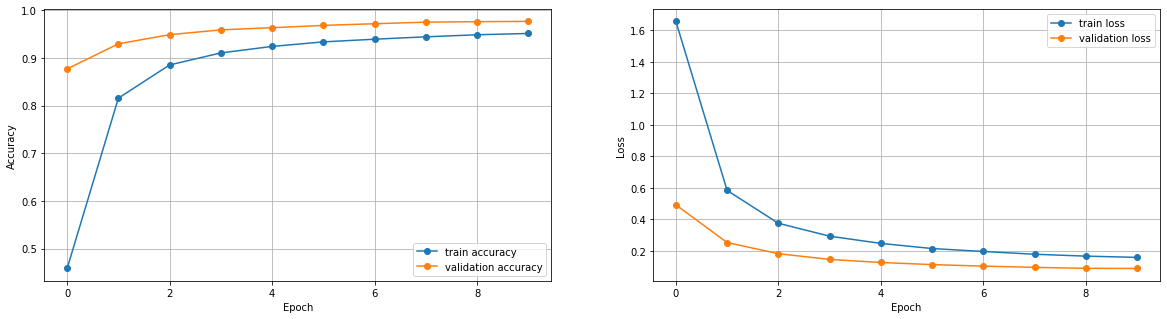

RMSProp with Normalized Data: 
Test Accuracy: 0.9926999807357788
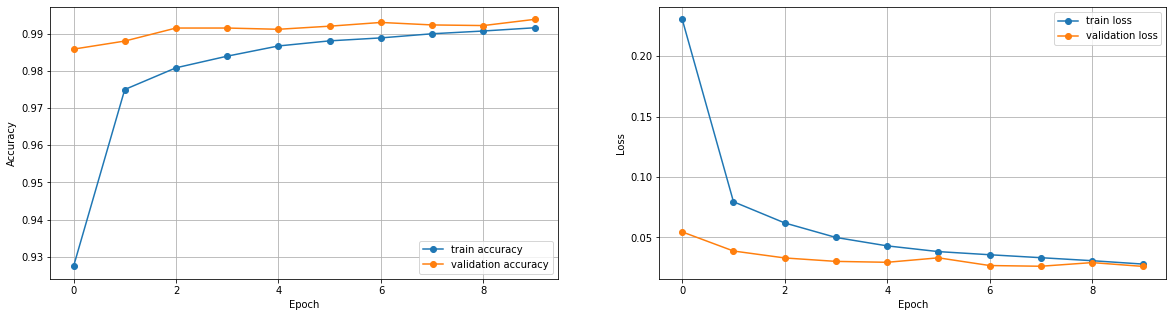




With ADAM optimizer we can see that we are getting the highest accuracy for the model, then slightly lower accuracy with RMSProp optimizer and finally by using the SGD optimizer it is found that the accuracy reduced nearly 2% for the model. 

***CNN Model Design For MNIST handwritten digits Dataset Classification:***

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [3]:
#Data Normaliztion
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [4]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6

In [6]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
#model.compile(
#    optimizer='SGD', 
#    loss='sparse_categorical_crossentropy', 
#    metrics=['accuracy']
#)

In [8]:
#model.compile(
#    optimizer='RMSProp', 
#    loss='sparse_categorical_crossentropy', 
#    metrics=['accuracy']
#)

In [9]:
x = model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=128)

Epoch 1/10
422/422 [==============================] - 4s 6ms/step - loss: 0.2459 - accuracy: 0.9250 - val_loss: 0.0590 - val_accuracy: 0.9822
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0835 - accuracy: 0.9737 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 3/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0314 - val_accuracy: 0.9920
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0275 - val_accuracy: 0.9927
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0257 - val_accuracy: 0.9922
Epoch 

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9928

Test Accuracy: 0.9927999973297119

Test Loss: 0.021069712936878204


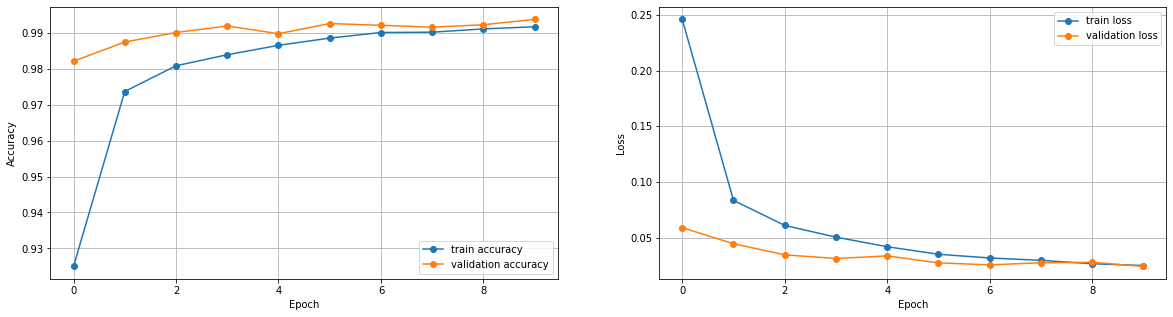

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(x.history['accuracy'], 'o-', label='train accuracy')
plt.plot(x.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(x.history['loss'], 'o-', label='train loss')
plt.plot(x.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
predictions = model.predict(x_test)

In [13]:
predictions[20]

array([6.2977878e-10, 1.6413182e-08, 4.0300846e-10, 1.0417429e-07,
       2.5068203e-04, 5.7947364e-07, 2.8513522e-12, 1.3254183e-04,
       4.1938115e-08, 9.9961603e-01], dtype=float32)

In [14]:
np.argmax(predictions[20])

9